# Fractal con Monte Carlo.
Un fractal es un objeto geométrico cuya estructura básica, fragmentada o aparentemente irregular, se repite a diferentes escalas.  La propiedad matemática clave de un objeto genuinamente fractal es que su dimensión métrica fractal es un número racional mayor a su dimensión topológica. 

En este caso, conseguimos formal un fractal a partir de un triangulo inicial utilizando un método de Monte Carlo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as random
import seaborn as sns
from time import time
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
jtplot.style(ticks=True, figsize=(15, 12))

Estas funciones únicamente son para calcular el tiempo de ejecución y los archivos txt para guardar los datos en caso de necesitarlos.

In [2]:
def tiempo_total(tiempo):
	tiempo_calculado=time()
	tiempo_final=(tiempo_calculado-tiempo)
	if (tiempo_final>3600):
		print('El código tardo %s horas en ejecutarse.' % (tiempo_final/3600))
	elif (tiempo_final>60):
		print('El código tardo %s minutos en ejecutarse.' % (tiempo_final/60))
	else:
		print('El código tardo %s segundos en ejecutarse.' % tiempo_final)

#Nos genera dos archivos txt para poder graficar en LaTex y para
#tener las posiciones exactas de nuestro sistema.
def txt(x,y,N):
	t1=open("puntos.txt","w")

	for i in range(0,N-1):
		t1.write(str(x[i])); t1.write(" "); t1.write(str(y[i]))
		t1.write("\n")

	t1.close()

En esta función creamos un triangulo para el método de Monte Carlo. Solamente calculamos los vertices del triangulo.

In [3]:
def triangulo():
    xt=np.zeros(4)
    yt=np.zeros(4)
    #Consideremos un triangulo con L=2
    L=2
    a=L/2
    
    xt[0]=0
    yt[0]=0+a
    xt[1]=xt[0]*np.cos(60)+yt[0]*np.sin(60)
    yt[1]=xt[0]*np.sin(60)+yt[0]*np.cos(60)
    xt[2]=xt[0]*np.cos(60)-yt[0]*np.sin(60)
    yt[2]=-xt[0]*np.sin(60)+yt[0]*np.cos(60)
    xt[3]=xt[0]
    yt[3]=yt[0]

    return xt,yt

Aquí unicamente conseguimos un punto inicial para el método (para hacerlo lo más aleatorio posible) y nos aseguramos que no este fuera del área a usar en nuestro triangulo. 

La otra función consiste en calcular los puntos medio para el método.

In [4]:
def particulas(xt,yt):
    x=xt+random.uniform(-0.25,0.25) #Coord. x para el punto.
    y=yt+random.uniform(-0.25,0.25) #Coord. y para el punto.

    r=np.sqrt((xt)**2+(yt)**2) #Radio 
    rc=np.sqrt((x)**2+(y)**2)
    while (r<rc):
            x=xt+random.uniform(-0.25,0.25) #Coord. x para el punto.
            y=yt+random.uniform(-0.25,0.25) #Coord. y para el punto.
            rc=np.sqrt((x)**2+(y)**2)
    return x,y

def punto_medio(puntox,puntoy,xt,yt):
    y=(puntoy+yt)/2
    x=(puntox+xt)/2

    return x,y

Este es el núcleo del código. Aqui es donde conseguimos unir las funciones anteriores y damos un valor inicial como la cantidad de particulas a usar.

In [5]:
def solucion():
    tiempo=time()

    #Generar nuestro triangulo.
    xt,yt=triangulo()
    N=2
    n=10001 #El No. de particulas a usar.
    puntox=np.zeros(n)
    puntoy=np.zeros(n)
    
    vertice=random.randint(0,N)
    puntox[0],puntoy[0]=particulas(xt[vertice],yt[vertice])
    for i in range(1,n):
        vertice=random.randint(0,N)
        puntox[i],puntoy[i]=punto_medio(puntox[i-1],puntoy[i-1],xt[vertice],yt[vertice])

    grafica=graficar(puntox,puntoy,xt,yt)
    tiempo_calculado=tiempo_total(tiempo)
    #archivo=txt(puntox,puntoy,n)

Ahora, creamos una función para la gráfica de nuestros resultados.

In [6]:
def graficar(puntox,puntoy,xt,yt):
	plt.figure()
	plt.title('Fractal')
	plt.plot(xt,yt,'r')
	plt.scatter(puntox,puntoy,c='black',linewidths=0.001)
	plt.show()

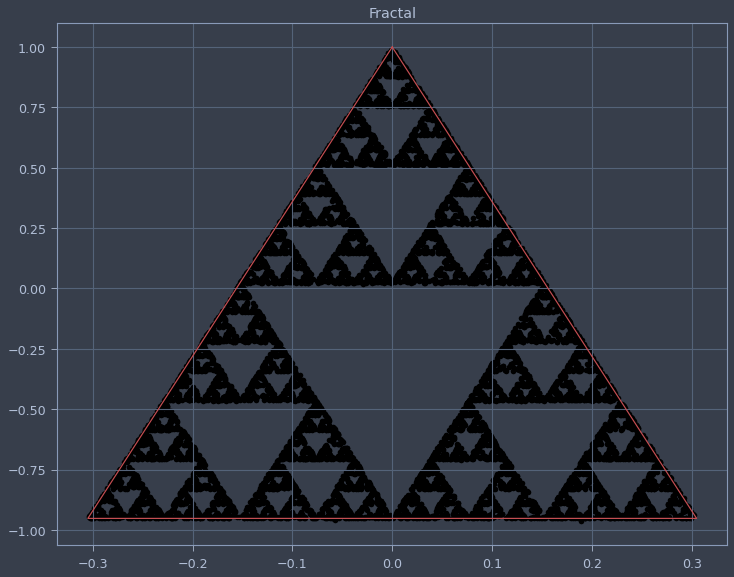

El código tardo 0.36882543563842773 segundos en ejecutarse.


In [7]:
if ( __name__ == '__main__' ):
	solucion=solucion()

Vemos que se formo un fractal exitosamente.